In [1]:
#Import data
import pandas as pd
DATAFILE = "join_with_scorecard2.csv"
Purchase_DF = pd.read_csv(DATAFILE)
print(list(Purchase_DF))

['mean_unexpcost', 'median_unexpcost', 'mean_return', 'median_return', 'mean_stdcost', 'median_stdcost', 'mean_pocost', 'median_pocost', 'mean_qty', 'median_qty', 'mean_return_qty', 'median_return_qty', 'mean_costsave', 'median_costsave', 'mean_spend', 'median_spend', 'mean_return_spend', 'median_return_spend', 'mean_leadtime', 'median_leadtime', 'mean_abc', 'median_abc', 'mean_source', 'median_source', 'num_orders_purch', 'num_returns_purch', 'Category', 'mean_late', 'median_late', 'mean_early', 'median_early', 'num_transactions_expo', '%Late', '%Early', '%Critical', 'SupplierID', 'quality_risk_mean', 'quality_risk_median', 'delivery_risk_mean', 'delivery_risk_median']


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
purchasing = Purchase_DF
purchasing2 = purchasing.drop(list(purchasing[purchasing['mean_late'] <=1].index), axis = 0)

plt.hist(purchasing2['mean_late'], bins = 15)
plt.title('Unexpected Cost')
plt.xlabel = ("Value")
plt.ylabel = ("Count")
#fname = "distr/" + feat + "_distr"
#plt.savefig(fname)

In [3]:
plt.show()

In [4]:
#Select features
PCA_feats = ['mean_unexpcost', 'mean_return', 'mean_qty', 'mean_costsave', 'mean_spend',
             'mean_leadtime','mean_abc', 'mean_source',
             'mean_late', 'mean_early','%Critical', 'quality_risk_mean', 'delivery_risk_mean']
Purch_PCA = Purchase_DF[PCA_feats]
Purch_PCA = Purch_PCA.dropna()

In [5]:
Purchase_DF.corr()

,mean_unexpcost,median_unexpcost,mean_return,median_return,mean_stdcost,median_stdcost,mean_pocost,median_pocost,mean_qty,median_qty,...,median_early,num_transactions_expo,%Late,%Early,%Critical,SupplierID,quality_risk_mean,quality_risk_median,delivery_risk_mean,delivery_risk_median
mean_unexpcost,1.000000,0.904139,-0.032522,-0.077136,-0.149002,-0.142349,-0.054324,-0.040017,0.032222,0.037335,...,0.002237,-0.001404,-0.011784,0.026508,0.004633,0.095694,-0.044937,0.033029,0.062254,0.109302
median_unexpcost,0.904139,1.000000,-0.047791,-0.058329,-0.117212,-0.111293,-0.027143,-0.013580,0.026965,0.028928,...,0.009234,-0.023316,0.010979,0.027236,0.019118,0.078961,-0.056520,0.014999,0.047821,0.099533
mean_return,-0.032522,-0.047791,1.000000,0.320123,0.147486,0.146092,0.143627,0.140534,-0.120407,-0.119173,...,-0.007257,-0.029121,-0.005085,-0.022961,0.078825,0.053598,0.127501,0.033491,0.078493,0.058799
median_return,-0.077136,-0.058329,0.320123,1.000000,0.070315,0.068238,0.069836,0.067452,-0.051739,-0.045059,...,0.007015,-0.010020,-0.003475,0.009825,-0.016608,-0.020631,-0.023411,-0.003562,-0.045507,-0.023845
mean_stdcost,-0.149002,-0.117212,0.147486,0.070315,1.000000,0.983477,0.956332,0.935939,-0.696483,-0.676261,...,0.127722,-0.047295,0.016947,0.120086,0.157300,0.085735,0.208160,0.093278,0.007849,-0.021895
median_stdcost,-0.142349,-0.111293,0.146092,0.068238,0.983477,1.000000,0.942924,0.950518,-0.683741,-0.669094,...,0.119171,-0.063423,0.025484,0.115331,0.153271,0.085966,0.201444,0.096763,0.011282,-0.017444
mean_pocost,-0.054324,-0.027143,0.143627,0.069836,0.956332,0.942924,1.000000,0.981967,-0.721189,-0.698803,...,0.138614,-0.054073,0.014317,0.134991,0.152363,0.078124,0.212919,0.090430,0.028912,0.001838
median_pocost,-0.040017,-0.013580,0.140534,0.067452,0.935939,0.950518,0.981967,1.000000,-0.704228,-0.687226,...,0.123117,-0.071007,0.022977,0.123982,0.147748,0.072963,0.200277,0.088521,0.027894,-0.000668
mean_qty,0.032222,0.026965,-0.120407,-0.051739,-0.696483,-0.683741,-0.721189,-0.704228,1.000000,0.968288,...,-0.103707,0.038806,-0.040837,-0.089283,-0.078954,-0.052289,-0.225503,-0.079412,-0.086278,-0.045771
median_qty,0.037335,0.028928,-0.119173,-0.045059,-0.676261,-0.669094,-0.698803,-0.687226,0.968288,1.000000,...,-0.104734,0.020543,-0.037530,-0.091628,-0.078211,-0.057190,-0.227101,-0.071977,-0.070365,-0.038594


In [6]:
#PCA Script + Run
from sklearn.decomposition import PCA
import numpy as np
def PCA_method(data):
    pca_model = PCA()
    pca_model.n_components = 6
    pca_fit = pca_model.fit(data)
    print("explained variance")
    print(pca_fit.explained_variance_ratio_)
    var_sum = sum(pca_fit.explained_variance_ratio_)
    print([p for p in pca_fit.explained_variance_ratio_])
    
    print("components")
    # matrix of size n_components X n_features
    # a_i,j tells how much the jth feature contributed to the ith component
    comp = pca_fit.components_
    print(comp)
    # summing along columns tells how much each feature contributes overall
    comp_sum = np.sum(comp, axis = 0)
    print(comp_sum)
    return pca_fit
pca=PCA_method(Purch_PCA) 
comp = pca.components_
params = pca.explained_variance_ratio_

explained variance
[0.21357971 0.19777049 0.13483404 0.09299124 0.09089317 0.08166999]
[0.21357970784096755, 0.1977704905884752, 0.13483403709838918, 0.09299123903083234, 0.09089317364033175, 0.08166999480321198]
components
[[-4.89973796e-02  1.87117443e-02  1.65669450e-02  6.75674024e-03
   2.74614925e-01  1.01705811e-01  8.84484587e-01  3.18853885e-01
   4.53669436e-04  3.35191631e-02  1.61378503e-01  3.96464896e-03
   2.88379366e-03]
 [ 6.89981719e-02  3.80587349e-03  2.36778522e-01 -6.50248986e-02
   2.12260080e-02  9.34213313e-02  3.12792226e-01 -9.01551302e-01
  -3.83771846e-03  1.59751559e-02 -3.41613238e-02 -1.43017413e-02
   1.16099857e-01]
 [-4.93805319e-02 -3.60387229e-02  8.79978230e-01 -1.43011288e-01
  -8.83965937e-02  2.91661717e-02 -2.37301059e-02  1.97629062e-01
   1.14859974e-03 -9.02467261e-02 -1.96816099e-01 -9.90167808e-02
  -3.10607761e-01]
 [-3.29584550e-01  1.84001353e-02  8.41377546e-02 -7.44340286e-01
  -1.64633975e-02  1.01847462e-02 -9.44775171e-02  6.375420

In [7]:
#Factor Analysis Script + Run
from sklearn.decomposition import FactorAnalysis
import numpy as np

FA_model = FactorAnalysis(svd_method = 'lapack')
FA_model.n_components = 6
FA_fit = FA_model.fit(Purch_PCA)
print("covariance")
print(FA_fit.get_covariance())
print("precision")
print(FA_fit.get_precision())
# print("noise")
# print(FA_fit.noise_variance_)
# print('Loglike')
# print(FA_fit.loglike_)
print("components")
# matrix of size n_components X n_features
# a_i,j tells how much the jth feature contributed to the ith component
compFA = FA_fit.components_
print(compFA)
# summing along columns tells how much each feature contributes overall
comp_sum = np.sum(compFA, axis = 0)
print([p for p in comp_sum])
FA = FA_fit

covariance
[[ 4.25396522e-01 -6.02464202e-03  1.85632475e-02  1.80226022e-01
  -2.68696469e-02  2.24886024e-02 -1.72697031e-02 -1.07329968e-01
  -9.36054687e-04  2.37866108e-03 -1.51297209e-02 -6.75763817e-03
   3.34253828e-02]
 [-6.02464202e-03  6.00909525e-02 -3.21878990e-02 -4.77718999e-03
   2.50894680e-02  4.25644228e-03  2.23796390e-02 -2.72885045e-03
   4.55973682e-04 -1.86080114e-03  1.15739707e-02  8.50161346e-03
   1.89085684e-02]
 [ 1.85632475e-02 -3.21878990e-02  1.08833241e+00 -7.99343560e-02
  -6.66763464e-02  6.48966968e-02  7.85222124e-02 -1.18913285e-01
   3.92986437e-04 -6.67732554e-02 -7.52918190e-02 -8.00577624e-02
  -7.44003498e-02]
 [ 1.80226022e-01 -4.77718999e-03 -7.99343560e-02  6.94701052e-01
   2.45563642e-03  9.26534592e-03 -2.10394362e-02  6.13795387e-02
   7.92472272e-04 -2.75035228e-03  3.90090379e-03 -1.28364617e-03
  -5.19484676e-03]
 [-2.68696469e-02  2.50894680e-02 -6.66763464e-02  2.45563642e-03
   4.17490674e-01  1.12809655e-01  3.65520231e-01  8.18

In [8]:
import matplotlib.pyplot as plt

In [9]:
#Generate vars for plotting
# PCA_feats = ['mean_unexpcost', 'mean_return', 'mean_qty', 'mean_costsave', 'mean_spend',
#              'mean_leadtime', 'mean_abc', 'mean_source',
#              'mean_late', 'mean_early','%Critical', 'quality_risk_mean', 'delivery_risk_mean']
uncost = [i[0] for i in comp]
ret = [i[1] for i in comp]
qty = [i[2] for i in comp]
costsave = [i[3] for i in comp]
spend = [i[4] for i in comp]
leadtime = [i[5] for i in comp]
abc = [i[6] for i in comp]
source = [i[7] for i in comp]
late = [i[8] for i in comp]
early = [i[9] for i in comp]
critical = [i[10] for i in comp]
qualrisk = [i[11] for i in comp]
delrisk = [i[12] for i in comp]

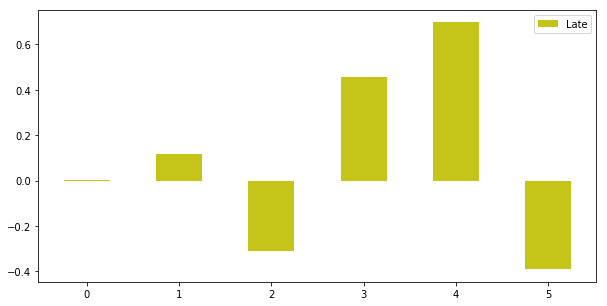

In [10]:
# PCA_feats = ['mean_unexpcost', 'mean_return', 'mean_qty', 'mean_costsave', 'mean_spend',
#              'mean_leadtime', 'mean_abc', 'mean_source',
#              'mean_late', 'mean_early','%Critical', 'quality_risk_mean', 'delivery_risk_mean']
index = np.arange(6)
error_config = {'ecolor': '0.3'}
bw = 0.5
op=0.9
plt.figure(figsize=(10,5))
# rects18 = plt.bar(index, qty, bw,
#                  alpha=op,
#                  color='black',
#                  error_kw=error_config,
#                  label='Unexpected Cost')
rects1 = plt.bar(index, delrisk, bw,
                 alpha=op,
                 color='y',
                 error_kw=error_config,
                 label='Late')
# rects2 = plt.bar(index, early,bw,
#                  alpha=op,
#                  color='y',
#                  error_kw=error_config,
#                  label='early')
# rects3 = plt.bar(index, critical, bw,
#                  alpha=op,
#                  color='orange',
#                  error_kw=error_config,
#                  label='critical')
# rects4 = plt.bar(index, spend, bw,
#                  alpha=op,
#                  color='y',
#                  error_kw=error_config,
#                  label='spend')
# rects5 = plt.bar(index, qualrisk, bw,
#                  alpha=op,
#                  color='y',
#                  error_kw=error_config,
#                  label='qualrisk')
# rects6 = plt.bar(index, delrisk, bw,
#                  alpha=op,
#                  color='y',
#                  error_kw=error_config,
#                  label='delrisk')
# rects7 = plt.bar(index, abc, bw,
#                  alpha=op,
#                  color='pink',
#                  error_kw=error_config,
#                  label='abc')
plt.legend()
plt.show()


In [11]:
#Varimax Algorithm
def varimax(Phi, gamma = 1.0, q = 20, tol = 1e-6):
    from numpy import eye, asarray, dot, sum, diag
    from numpy.linalg import svd
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in range(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d/d_old < tol: break
    return dot(Phi, R)

In [12]:
sol = varimax(comp)
print(sol)

[[ 2.08878325e-18  4.92634362e-16 -1.41922064e-16 -6.73289549e-16
   4.04042847e-15  2.09909672e-15  1.00000000e+00  1.60537816e-15
  -7.31836466e-17 -2.10131934e-17  2.49496604e-15 -2.67255836e-17
   1.42334061e-15]
 [ 1.85940673e-17  4.33680869e-18  1.97758476e-15 -3.60822483e-16
  -3.55618313e-16 -2.22911967e-16  2.69646501e-15 -1.00000000e+00
  -5.20417043e-17  5.48606299e-17 -1.66533454e-16 -6.93889390e-18
   1.95676808e-15]
 [ 3.62123526e-17  4.33680869e-17  1.00000000e+00  2.77555756e-17
  -1.19695920e-16 -2.35922393e-16 -2.71917905e-16  1.82492910e-15
   9.02056208e-17  3.98986399e-17 -9.02056208e-16 -9.71445147e-17
  -2.49800181e-15]
 [-8.67361738e-19 -2.08166817e-17  2.49800181e-16 -1.00000000e+00
   1.04083409e-17 -1.31838984e-16 -8.12934789e-16 -1.73472348e-16
  -4.16333634e-17  2.86229374e-17  2.69229083e-15  1.38777878e-17
  -5.05151476e-15]
 [ 6.50521303e-18 -2.11636264e-16  2.49800181e-15 -4.88498131e-15
  -2.75474088e-15 -1.40165657e-15 -1.79370407e-15  2.37310172e-15


/software/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in double_scalars


In [13]:
#Generate DFs
fa = pd.DataFrame(data = compFA,columns = PCA_feats)
orig = pd.DataFrame(data = comp,columns = PCA_feats)
varimax = pd.DataFrame(data = sol,columns = PCA_feats)
fa = fa.transpose()
orig = orig.transpose()
varimax = varimax.transpose()

colnames = ['comp1','comp2','comp3','comp4','comp5','comp6']
fa.columns = colnames
orig.columns = colnames
varimax.columns = colnames


# orig = pd.DataFrame(orig, columns = compnames)
# varimax = pd.DataFrame(varimax, columns = compnames)

In [14]:
print(list(fa))
fa

['comp1', 'comp2', 'comp3', 'comp4', 'comp5', 'comp6']


,comp1,comp2,comp3,comp4,comp5,comp6
mean_unexpcost,-0.054448,0.061094,-0.107483,0.127913,-0.332953,0.002779
mean_return,0.043508,0.037643,0.020857,-0.013676,0.005648,-0.030233
mean_qty,-0.145316,-0.399829,0.217009,0.464609,0.005572,0.298295
mean_costsave,0.000534,0.064530,-0.168326,-0.071125,-0.502015,0.061399
mean_spend,0.575519,-0.024368,0.031530,0.014601,-0.022630,-0.021076
mean_leadtime,0.194891,0.022903,-0.005074,0.169985,-0.027579,0.082646
mean_abc,0.624555,-0.034632,0.132338,0.201243,-0.021095,0.111745
mean_source,0.168695,-0.137364,0.055687,-0.670592,-0.001836,0.503419
mean_late,-0.003611,-0.001281,0.023290,-0.010469,-0.008396,-0.002639
mean_early,0.104119,0.087889,-0.340641,0.072285,0.130338,0.077471


In [15]:
print(list(orig))
orig

['comp1', 'comp2', 'comp3', 'comp4', 'comp5', 'comp6']


,comp1,comp2,comp3,comp4,comp5,comp6
mean_unexpcost,-0.048997,0.068998,-0.049381,-0.329585,0.299318,0.098035
mean_return,0.018712,0.003806,-0.036039,0.018400,-0.003869,0.002269
mean_qty,0.016567,0.236779,0.879978,0.084138,0.324890,0.106867
mean_costsave,0.006757,-0.065025,-0.143011,-0.744340,0.438972,0.110007
mean_spend,0.274615,0.021226,-0.088397,-0.016463,-0.074285,0.136916
mean_leadtime,0.101706,0.093421,0.029166,0.010185,0.234621,0.134342
mean_abc,0.884485,0.312792,-0.023730,-0.094478,-0.083442,-0.177490
mean_source,0.318854,-0.901551,0.197629,0.063754,0.151721,-0.097608
mean_late,0.000454,-0.003838,0.001149,0.002372,0.003234,-0.002236
mean_early,0.033519,0.015975,-0.090247,0.005649,-0.036746,0.076501


In [16]:
print(list(varimax))
varimax

['comp1', 'comp2', 'comp3', 'comp4', 'comp5', 'comp6']


,comp1,comp2,comp3,comp4,comp5,comp6
mean_unexpcost,2.088783e-18,1.859407e-17,3.621235e-17,-8.673617e-19,6.505213e-18,2.970714e-17
mean_return,4.926344e-16,4.336809e-18,4.336809e-17,-2.081668e-17,-2.116363e-16,3.642919e-17
mean_qty,-1.419221e-16,1.977585e-15,1.000000e+00,2.498002e-16,2.498002e-15,1.096345e-15
mean_costsave,-6.732895e-16,-3.608225e-16,2.775558e-17,-1.000000e+00,-4.884981e-15,2.747802e-15
mean_spend,4.040428e-15,-3.556183e-16,-1.196959e-16,1.040834e-17,-2.754741e-15,-3.885781e-16
mean_leadtime,2.099097e-15,-2.229120e-16,-2.359224e-16,-1.318390e-16,-1.401657e-15,-2.706169e-16
mean_abc,1.000000e+00,2.696465e-15,-2.719179e-16,-8.129348e-16,-1.793704e-15,-2.416903e-15
mean_source,1.605378e-15,-1.000000e+00,1.824929e-15,-1.734723e-16,2.373102e-15,-2.706169e-16
mean_late,-7.318365e-17,-5.204170e-17,9.020562e-17,-4.163336e-17,-1.387779e-17,-6.938894e-18
mean_early,-2.101319e-17,5.486063e-17,3.989864e-17,2.862294e-17,-1.908196e-17,8.673617e-18


In [17]:
PCA_feats[0]

'mean_unexpcost'

In [18]:
def RowGen(data):
    name = "join_with_scorecard2.csv"
    feats = ['mean_unexpcost', 'mean_return', 'mean_qty', 'mean_costsave', 'mean_spend',
             'mean_leadtime','mean_abc', 'mean_source',
             'mean_late', 'mean_early','%Critical', 'quality_risk_mean', 'delivery_risk_mean']
    feats0 =['comp1','comp2','comp3','comp4','comp5','comp6']

    df = pd.read_csv(name)

    for feat in feats0:
        df[feat] = np.nan
        pd.to_numeric(df[feat], downcast = 'float')
    for i, row in df.iterrows():
        for c in feats0:
            k = 0
            for j,a,b in zip(list(range(0, 12)),feats,data.iterrows()):
#                 print(j)
                k = k + df[a][i] * data[c][j]
            df[c][i] = k
    return df      

In [19]:
df_pca = RowGen(orig)
df_pca

/software/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,mean_unexpcost,median_unexpcost,mean_return,median_return,mean_stdcost,median_stdcost,mean_pocost,median_pocost,mean_qty,median_qty,...,quality_risk_mean,quality_risk_median,delivery_risk_mean,delivery_risk_median,comp1,comp2,comp3,comp4,comp5,comp6
0,3.000000,3.0,1.000000,1,3.000000,3.0,3.000000,3.0,2.428571,2.0,...,1.000000,1.0,1.000000,1.0,3.270315,-3.449133,1.515809,-3.301683,4.686408,1.987236
1,1.700000,2.0,1.400000,1,3.000000,3.0,3.000000,3.0,3.111111,3.0,...,1.000000,1.0,1.000000,1.0,4.163160,-3.057057,2.361887,-2.013344,3.931317,1.654192
2,2.000000,2.0,1.000000,1,1.000000,1.0,1.000000,1.0,4.000000,4.0,...,1.000000,1.0,1.000000,1.0,3.841236,-3.295546,2.328082,-0.600249,4.785406,5.177213
3,1.989474,2.0,1.084211,1,5.000000,5.0,5.000000,5.0,1.080645,1.0,...,1.043478,1.0,2.565217,1.0,6.309355,-2.744413,-0.085521,-3.440715,3.981590,2.277747
4,3.185185,4.0,1.000000,1,1.222222,1.0,1.851852,2.0,4.185185,5.0,...,1.000000,1.0,1.416667,1.0,5.636399,0.422886,2.643079,-2.295758,3.562241,1.644919
5,2.789474,3.0,1.000000,1,5.000000,5.0,5.000000,5.0,1.105263,1.0,...,1.000000,1.0,1.705882,1.0,4.518442,-3.158125,0.735441,-1.599960,3.217051,1.506734
6,1.388889,1.0,1.000000,1,4.888889,5.0,4.888889,5.0,1.000000,1.0,...,1.000000,1.0,1.705882,1.0,3.267496,-3.839198,0.507679,-2.056710,3.233358,1.519035
7,1.200000,1.0,1.000000,1,2.000000,2.0,2.000000,2.0,1.200000,1.0,...,1.541667,1.0,3.750000,4.0,3.292386,-3.791404,0.666444,-1.811659,3.234756,1.500131
8,2.000000,2.0,1.000000,1,3.666667,4.0,3.666667,4.0,1.000000,1.0,...,1.541667,1.0,3.750000,4.0,3.453286,-3.596719,0.509276,-2.071785,3.878475,1.825870
9,1.666667,1.0,1.000000,1,5.000000,5.0,5.000000,5.0,1.000000,1.0,...,1.541667,1.0,3.750000,4.0,2.988388,-1.228274,-0.695610,-1.565951,2.833956,3.618891


In [20]:
df_varimax = RowGen(varimax)
df_varimax

/software/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,mean_unexpcost,median_unexpcost,mean_return,median_return,mean_stdcost,median_stdcost,mean_pocost,median_pocost,mean_qty,median_qty,...,quality_risk_mean,quality_risk_median,delivery_risk_mean,delivery_risk_median,comp1,comp2,comp3,comp4,comp5,comp6
0,3.000000,3.0,1.000000,1,3.000000,3.0,3.000000,3.0,2.428571,2.0,...,1.000000,1.0,1.000000,1.0,1.000000,-5.000000,2.428571,-4.285714,-8.802049e-15,1.0
1,1.700000,2.0,1.400000,1,3.000000,3.0,3.000000,3.0,3.111111,3.0,...,1.000000,1.0,1.000000,1.0,1.800000,-5.000000,3.111111,-3.100000,-4.270701e-15,1.0
2,2.000000,2.0,1.000000,1,1.000000,1.0,1.000000,1.0,4.000000,4.0,...,1.000000,1.0,1.000000,1.0,1.000000,-5.000000,4.000000,-3.000000,1.229659e-14,5.0
3,1.989474,2.0,1.084211,1,5.000000,5.0,5.000000,5.0,1.080645,1.0,...,1.043478,1.0,2.565217,1.0,3.968421,-4.763158,1.080645,-4.784211,-2.129447e-14,2.0
4,3.185185,4.0,1.000000,1,1.222222,1.0,1.851852,2.0,4.185185,5.0,...,1.000000,1.0,1.416667,1.0,4.407407,-2.444444,4.185185,-2.370370,-8.555817e-15,1.0
5,2.789474,3.0,1.000000,1,5.000000,5.0,5.000000,5.0,1.105263,1.0,...,1.000000,1.0,1.705882,1.0,2.157895,-5.000000,1.105263,-1.789474,-5.159529e-15,1.0
6,1.388889,1.0,1.000000,1,4.888889,5.0,4.888889,5.0,1.000000,1.0,...,1.000000,1.0,1.705882,1.0,1.000000,-5.000000,1.000000,-3.166667,-6.365303e-15,1.0
7,1.200000,1.0,1.000000,1,2.000000,2.0,2.000000,2.0,1.200000,1.0,...,1.541667,1.0,3.750000,4.0,1.000000,-5.000000,1.200000,-3.000000,-5.223542e-15,1.0
8,2.000000,2.0,1.000000,1,3.666667,4.0,3.666667,4.0,1.000000,1.0,...,1.541667,1.0,3.750000,4.0,1.000000,-5.000000,1.000000,-3.000000,-8.521251e-15,1.0
9,1.666667,1.0,1.000000,1,5.000000,5.0,5.000000,5.0,1.000000,1.0,...,1.541667,1.0,3.750000,4.0,1.000000,-2.000000,1.000000,-3.000000,-1.147708e-14,3.0


In [21]:
df_fa = RowGen(fa)
df_fa

/software/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,mean_unexpcost,median_unexpcost,mean_return,median_return,mean_stdcost,median_stdcost,mean_pocost,median_pocost,mean_qty,median_qty,...,quality_risk_mean,quality_risk_median,delivery_risk_mean,delivery_risk_median,comp1,comp2,comp3,comp4,comp5,comp6
0,3.000000,3.0,1.000000,1,3.000000,3.0,3.000000,3.0,2.428571,2.0,...,1.000000,1.0,1.000000,1.0,2.779375,-0.467805,-1.705589,-1.334762,-2.562004,4.174863
1,1.700000,2.0,1.400000,1,3.000000,3.0,3.000000,3.0,3.111111,3.0,...,1.000000,1.0,1.000000,1.0,3.461119,-1.011222,-0.723497,-1.019184,-1.695319,4.288200
2,2.000000,2.0,1.000000,1,1.000000,1.0,1.000000,1.0,4.000000,4.0,...,1.000000,1.0,1.000000,1.0,3.093322,-0.834651,-1.036779,-0.981372,-1.473589,4.673399
3,1.989474,2.0,1.084211,1,5.000000,5.0,5.000000,5.0,1.080645,1.0,...,1.043478,1.0,2.565217,1.0,5.649442,0.035757,-1.454821,-1.420401,-2.589827,4.012872
4,3.185185,4.0,1.000000,1,1.222222,1.0,1.851852,2.0,4.185185,5.0,...,1.000000,1.0,1.416667,1.0,4.558946,-1.087246,-0.682488,1.927344,-1.718497,3.596726
5,2.789474,3.0,1.000000,1,5.000000,5.0,5.000000,5.0,1.105263,1.0,...,1.000000,1.0,1.705882,1.0,4.188707,-0.215918,-1.108889,-1.444352,-1.417039,3.762705
6,1.388889,1.0,1.000000,1,4.888889,5.0,4.888889,5.0,1.000000,1.0,...,1.000000,1.0,1.705882,1.0,2.970222,-0.066327,-1.658011,-2.145953,-1.465463,3.669370
7,1.200000,1.0,1.000000,1,2.000000,2.0,2.000000,2.0,1.200000,1.0,...,1.541667,1.0,3.750000,4.0,2.987031,-0.076765,-1.549049,-2.069306,-1.310256,3.731050
8,2.000000,2.0,1.000000,1,3.666667,4.0,3.666667,4.0,1.000000,1.0,...,1.541667,1.0,3.750000,4.0,3.362318,0.097882,-1.688585,-1.719927,-1.632891,3.838907
9,1.666667,1.0,1.000000,1,5.000000,5.0,5.000000,5.0,1.000000,1.0,...,1.541667,1.0,3.750000,4.0,3.631732,0.592759,-1.750386,-0.320496,-1.436155,2.140230


In [22]:
df_pca.to_csv("PCA_original.csv", index = False)
df_varimax.to_csv("PCA_varimax.csv", index = False)
df_fa.to_csv("FA.csv", index = False)

In [23]:
# params

In [24]:
# comp_sum

In [25]:
# fa.to_csv("FA.csv", index = False)
# orig.to_csv("PCA_original.csv", index = False)
# varimax.to_csv("PCA_Varimax.csv", index = False)
# np.savetxt("PCA_explainedvariance.csv", params, delimiter=",")

In [26]:
# print(sol)

#### Tsne

In [27]:
# def Labels_to_color (df, classif,label_col):
#     """
#     For a dataframe (df) and its classification (classif) it 
#     turns each class label to numerical values and returns the dataframe
#     """
    
#     ClassList= df[classif].unique()
#     id = 0
#     color = ['b', 'g', 'r', 'y',  'w', 'c']

#     marker = ['o','x','+','^','s','v']
#     ClassDict = {}
#     for ClassVal in ClassList:
        
#         ClassDict[ClassVal]= color[id]
#         id = id+1
#     print(ClassDict)
#     for ClassNum in ClassDict.keys():
#         df.ix[df[classif]==ClassNum,label_col] = ClassDict[ClassNum]
#         print (ClassDict[ClassNum])
#     df=df.drop(classif,axis =1)
#     print(df[label_col].unique())
        
#     return df

In [28]:
# q23 = 0
# q24 = 1
# if(q24/q23 < 2):
#     print (q23)

In [29]:
pca=PCA_method(Purch_PCA) 
comp = pca.components_

explained variance
[0.21357971 0.19777049 0.13483404 0.09299124 0.09089317 0.08166999]
[0.21357970784096755, 0.1977704905884755, 0.13483403709838884, 0.09299123903083248, 0.09089317364033181, 0.08166999480321187]
components
[[-4.89973796e-02  1.87117443e-02  1.65669450e-02  6.75674024e-03
   2.74614925e-01  1.01705811e-01  8.84484587e-01  3.18853885e-01
   4.53669436e-04  3.35191631e-02  1.61378503e-01  3.96464896e-03
   2.88379366e-03]
 [ 6.89981719e-02  3.80587349e-03  2.36778522e-01 -6.50248986e-02
   2.12260080e-02  9.34213313e-02  3.12792226e-01 -9.01551302e-01
  -3.83771846e-03  1.59751559e-02 -3.41613238e-02 -1.43017413e-02
   1.16099857e-01]
 [-4.93805319e-02 -3.60387229e-02  8.79978230e-01 -1.43011288e-01
  -8.83965937e-02  2.91661717e-02 -2.37301059e-02  1.97629062e-01
   1.14859974e-03 -9.02467261e-02 -1.96816099e-01 -9.90167808e-02
  -3.10607761e-01]
 [-3.29584550e-01  1.84001353e-02  8.41377546e-02 -7.44340286e-01
  -1.64633975e-02  1.01847462e-02 -9.44775171e-02  6.375420

In [30]:
pca = PCA(n_components=6)
X = Purch_PCA
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
df_pca= pd.DataFrame(X_pca)
print(df_pca)
print(X_pca)
# q.transform()

original shape:    (578, 13)
transformed shape: (578, 6)
            0         1         2         3         4         5
0   -0.684780 -1.540639  0.568461 -1.574297  0.364371  0.335788
1    0.208065 -1.148563  1.414539 -0.285958 -0.390720  0.002744
2   -0.113859 -1.387052  1.380734  1.127137  0.463369  3.525765
3    2.358773 -0.654198 -1.519038 -1.001606  0.750940  0.014130
4    1.682505  2.379755  1.566311 -0.378909 -0.469265 -0.169491
5    0.565382 -1.167678 -0.431159  0.448400 -0.612792 -0.420790
6   -0.685564 -1.848751 -0.658922 -0.008350 -0.596486 -0.408490
7   -0.654778 -1.563636 -1.135075  1.166185  0.830225 -1.226865
8   -0.493878 -1.368950 -1.292243  0.906059  1.473944 -0.901127
9   -0.958776  0.999494 -2.497129  1.411893  0.429425  0.891894
10  -1.223310  0.105827 -1.546945  0.823488  0.680972 -1.039955
11   2.809490 -0.385861 -0.641226 -1.498766  0.797182 -1.123947
12  -0.788883 -0.999186  1.862554  1.242823  0.523123 -0.646289
13  -1.134839  0.093966  1.203318  1.090110  0.

In [31]:
# X_new = pca.inverse_transform(X_pca)
# plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
# plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
# plt.axis('equal');
# # print(list(X_new))